<a href="https://colab.research.google.com/github/Alpha-Num12/Solidity-Projects/blob/main/Dynamic_Product_Placement_Using_Purchase_Heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd

# Load your Excel file into a DataFrame called df
df = pd.read_excel('/content/store_data.xlsx')
# Group products by transaction
transactions = df.groupby('Transaction_ID')['Product_Name'].apply(list)

# Count pairs
from collections import Counter
pair_counter = Counter()

for items in transactions:
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            pair = tuple(sorted([items[i], items[j]]))
            pair_counter[pair] += 1

# Convert results to a DataFrame
pair_df = pd.DataFrame(pair_counter.items(), columns=['Product_Pair', 'Count'])
pair_df.sort_values(by='Count', ascending=False).head(10)




,Product_Pair,Count
0,"(Chips, Soda)",1


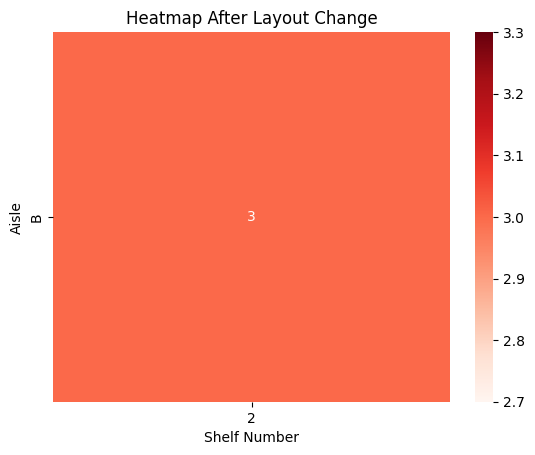

In [5]:
new_df = pd.read_excel('/content/store_data_updated.xlsx')

# Remove rows with missing Shelf_Location
new_df = new_df[new_df['Shelf_Location'].notna()]

# Convert Shelf_Location to string before splitting
new_df['Shelf_Location'] = new_df['Shelf_Location'].astype(str)
new_df['Shelf_X'] = new_df['Shelf_Location'].apply(lambda x: int(x.split('_')[1]))
new_df['Shelf_Y'] = new_df['Shelf_Location'].apply(lambda x: x.split('_')[0])




import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = new_df.groupby(['Shelf_Y', 'Shelf_X'])['Quantity'].sum().unstack().fillna(0)

sns.heatmap(heatmap_data, cmap='Reds', annot=True)
plt.title('Heatmap After Layout Change')
plt.xlabel('Shelf Number')
plt.ylabel('Aisle')
plt.show()
